<a href="https://colab.research.google.com/github/chin2yere/FDSfE_COffor/blob/main/class_work/Copy_of_FDSfE_DBSCAN_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import json

import pandas as pd
import numpy as np
import pylab as plt

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [5]:
env = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = env["username"]
os.environ["KAGGLE_KEY"] = env["key"]

In [6]:
!mkdir chocolate

In [7]:
cd chocolate

/content/drive/MyDrive/chocolate


In [8]:
!kaggle datasets list -s chocolate

ref                                                          title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rtatman/chocolate-bar-ratings                                Chocolate Bar Ratings                                30KB  2017-08-11 23:25:42          60887        942  0.7647059        
andrewmvd/chocolate-ratings                                  Chocolate Ratings                                    73KB  2022-01-09 10:11:07           1303         41  1.0              
soroushghaderi/chocolate-bar-2020                            Chocolate Bar 2020                                   72KB  2020-04-19 05:09:47           3459         50  1.0              
evangower/chocolate-bar-ratings                              Chocolate Bar 

In [9]:
!kaggle datasets download -d andrewmvd/chocolate-ratings

  0% 0.00/73.0k [00:00<?, ?B/s]
100% 73.0k/73.0k [00:00<00:00, 10.3MB/s]


In [10]:
ls

chocolate-ratings.zip


In [11]:
!unzip chocolate-ratings.zip

Archive:  chocolate-ratings.zip
  inflating: chocolate_makers.csv    
  inflating: chocolate_ratings.csv   


In [13]:
ls

chocolate_makers.csv  chocolate_ratings.csv  chocolate-ratings.zip


In [14]:
df = pd.read_csv("chocolate_ratings.csv")

In [15]:
df

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75%,"3- B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2530 non-null   int64  
 1   Company (Manufacturer)            2530 non-null   object 
 2   Company Location                  2530 non-null   object 
 3   Review Date                       2530 non-null   int64  
 4   Country of Bean Origin            2530 non-null   object 
 5   Specific Bean Origin or Bar Name  2530 non-null   object 
 6   Cocoa Percent                     2530 non-null   object 
 7   Ingredients                       2443 non-null   object 
 8   Most Memorable Characteristics    2530 non-null   object 
 9   Rating                            2530 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 197.8+ KB


In [17]:
np.array(df["Cocoa Percent"][0].split('%')[0]).astype(float)

array(76.)

In [18]:
df['%Cocoa'] = df['Cocoa Percent'].apply(lambda x: x.split('%')[0])
df['%Cocoa'] = df['%Cocoa'].astype(float)

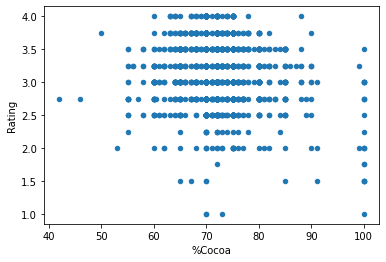

In [19]:
df.plot("%Cocoa", "Rating", kind="scatter");

In [20]:
features = df[['%Cocoa','Rating']]

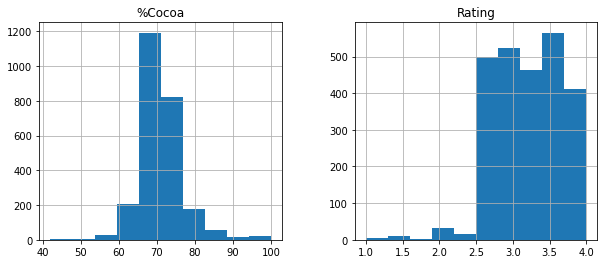

In [21]:
features.hist(figsize=(10,4));

In [22]:
features = (features - features.mean()) / features.std()

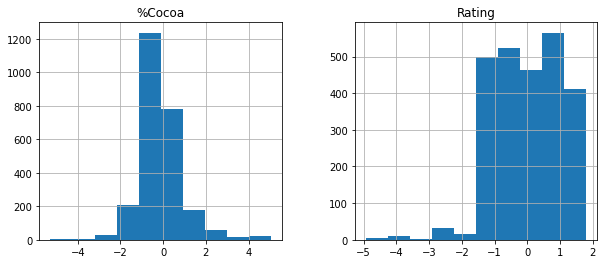

In [23]:
features.hist(figsize=(10,4));

# DBSCAN

In [24]:
from sklearn.cluster import DBSCAN

In [25]:
dbscan = DBSCAN(eps=1.1, min_samples=5)
dbscan.fit(features)

DBSCAN(eps=1.1)

In [27]:
df["labels"] = dbscan.labels_
df["labels"]

0       0
1       0
2       0
3       0
4       0
       ..
2525    0
2526    0
2527    0
2528    0
2529    0
Name: labels, Length: 2530, dtype: int64

In [28]:
np.unique(df["labels"])

array([-1,  0,  1])

In [29]:
for label in df["labels"].unique():
  print(label, (df["labels"]==label).sum())

0 2500
1 22
-1 8


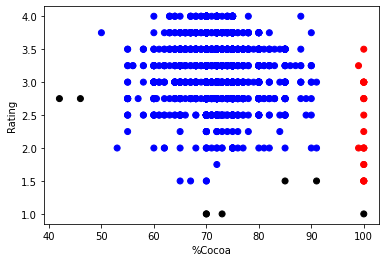

In [30]:
clrs=np.array(["b", "r", "k"])

plt.scatter(df['%Cocoa'], df['Rating'], color=clrs[df["labels"]])
plt.xlabel("%Cocoa")
plt.ylabel("Rating");

In [31]:
import plotly.express as px

df["labels"] = df["labels"].astype(str)
fig = px.scatter(df, x='%Cocoa', y='Rating', hover_name="Company (Manufacturer)",
                 color='labels', color_discrete_sequence=px.colors.qualitative.Safe)
fig.update_traces(marker={'size': 10})
fig.show()

# More Features

In [32]:
import plotly.express as px

df["labels"] = df["labels"].astype(str)
fig = px.scatter_3d(df, x='%Cocoa', y='Rating', z='Review Date',
                    hover_name="Company (Manufacturer)")
fig.update_traces(marker={'size': 3})
fig.show()

In [33]:
features = df[['%Cocoa','Rating', 'Review Date']]

In [34]:
features = (features - features.mean()) / features.std()

In [35]:
dbscan = DBSCAN(eps=1.1, min_samples=5)
dbscan.fit(features)

DBSCAN(eps=1.1)

In [36]:
df["labels"] = dbscan.labels_

In [37]:
for label in df["labels"].unique():
  print(label, (df["labels"]==label).sum())

0 2492
1 9
-1 19
2 10


In [38]:
import plotly.express as px

df["labels"] = df["labels"].astype(str)
fig = px.scatter_3d(df, x='%Cocoa', y='Rating', z='Review Date',
                    hover_name="Company (Manufacturer)",
                    color='labels', color_discrete_sequence=px.colors.qualitative.Safe)
fig.update_traces(marker={'size': 3})
fig.show()